# Our previous notebook allowed us to make a connection to the Spotify API, extract all relevant data, store them appropriately in Pandas dataframes, and tidy up the data. 

# Notebook Objective: We now begin visualisation of my Spotify listening data.

# The visualisations here include:
- Getting some cool statistics about listening habits including:
    - Top Tracks short medium and long term
    - Top artists short medium and long term
- Distribution of various audio features 
    - For saved tracks
    - For short term, medium term, and long term top tracks
- Correlatipons between audio features
    - Scatter Plots
    - Correlation Matrices

Let's first import our saved tracks into a pandas dataframe by reading the CSV files we saved from previous notebook (also provided in this repo if you wish to play with the data yourself)

In [15]:
import pandas as pd
df_saved_tracks = pd.read_csv('saved_tracks.csv')
df_top_tracks = pd.read_csv('top_tracks.csv')
df_top_artists=pd.read_csv('top_artists.csv')
#save copies to refer to in case any adjustments cause issues
df_saved_tracks_original = df_saved_tracks.copy()
df_top_tracks_original=df_top_tracks.copy()
df_top_artists_original=df_top_artists.copy()

In [16]:
from IPython.display import display
print('My Saved Tracks:')
display(df_saved_tracks.head())
print('My Top Tracks (short, medium, and long term):')
display(df_top_tracks.head())
print('My Top Artists (short, medium, and long Term):')
display(df_top_artists.head())

My Saved Tracks:


,id,name_x,artist,album,release_date,duration_ms_x,added_at,genres,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,time_signature
0,2UOopL3Y405ruJyMzJcdWD,Khserna Baad,Maya Diab,Khserna Baad,2019-06-03,187561,2023-08-03 19:11:51+00:00,"['arab pop', 'lebanese pop']",0.689,0.605,...,0.127,0.000000,0.0827,0.146,87.017,audio_features,spotify:track:2UOopL3Y405ruJyMzJcdWD,https://api.spotify.com/v1/tracks/2UOopL3Y405r...,https://api.spotify.com/v1/audio-analysis/2UOo...,4
1,0WVTQp3SOCuMr08jh1jweV,Bring It On Home to Me,Sam Cooke,The Man Who Invented Soul,2000-09-26,162533,2023-08-01 16:48:21+00:00,"['classic soul', 'soul', 'vocal jazz']",0.523,0.402,...,0.778,0.000000,0.4320,0.675,70.863,audio_features,spotify:track:0WVTQp3SOCuMr08jh1jweV,https://api.spotify.com/v1/tracks/0WVTQp3SOCuM...,https://api.spotify.com/v1/audio-analysis/0WVT...,4
2,1XPj5quoeV5Gd0paSUDpvm,You Send Me - Mono,Sam Cooke,Sam Cooke,1958-02-01,165733,2023-07-23 14:55:49+00:00,"['classic soul', 'soul', 'vocal jazz']",0.572,0.365,...,0.880,0.000000,0.1250,0.410,96.022,audio_features,spotify:track:1XPj5quoeV5Gd0paSUDpvm,https://api.spotify.com/v1/tracks/1XPj5quoeV5G...,https://api.spotify.com/v1/audio-analysis/1XPj...,4
3,2G0GextMwZJLkNxcSZ7ZJ3,(What A) Wonderful World - Mono,Sam Cooke,The Wonderful World Of Sam Cooke,1960-02-01,128786,2023-07-20 01:18:55+00:00,"['classic soul', 'soul', 'vocal jazz']",0.686,0.672,...,0.700,0.000000,0.1350,0.857,128.550,audio_features,spotify:track:2G0GextMwZJLkNxcSZ7ZJ3,https://api.spotify.com/v1/tracks/2G0GextMwZJL...,https://api.spotify.com/v1/audio-analysis/2G0G...,4
4,1HkOPLwAJH3kE8UnqgxF4s,Skinny Love,Bon Iver,"For Emma, Forever Ago",2008-05-12,238532,2023-07-20 00:55:48+00:00,"['chamber pop', 'eau claire indie', 'indie fol...",0.592,0.256,...,0.842,0.000002,0.0880,0.103,76.358,audio_features,spotify:track:1HkOPLwAJH3kE8UnqgxF4s,https://api.spotify.com/v1/tracks/1HkOPLwAJH3k...,https://api.spotify.com/v1/audio-analysis/1HkO...,4


My Top Tracks (short, medium, and long term):


,id,name_x,album,artist,duration_ms_x,popularity,time_range,genres,danceability,energy,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms_y,time_signature
0,1HkOPLwAJH3kE8UnqgxF4s,Skinny Love,"For Emma, Forever Ago",Bon Iver,238532,69,short_term,"['chamber pop', 'eau claire indie', 'indie fol...",0.592,0.256,...,0.000002,0.0880,0.103,76.358,audio_features,spotify:track:1HkOPLwAJH3kE8UnqgxF4s,https://api.spotify.com/v1/tracks/1HkOPLwAJH3k...,https://api.spotify.com/v1/audio-analysis/1HkO...,238533,4
1,5DBmXF7QO43Cuy9yqva116,Family Business,The College Dropout,Kanye West,278893,67,short_term,"['chicago rap', 'hip hop', 'rap']",0.744,0.524,...,0.000000,0.3920,0.606,93.691,audio_features,spotify:track:5DBmXF7QO43Cuy9yqva116,https://api.spotify.com/v1/tracks/5DBmXF7QO43C...,https://api.spotify.com/v1/audio-analysis/5DBm...,278893,4
2,4vHNeBWDQpVCmGbaccrRzi,Goodie Bag,Goodie Bag,Still Woozy,146390,78,short_term,"['bedroom pop', 'oakland indie', 'pov: indie']",0.739,0.522,...,0.001240,0.2330,0.619,138.263,audio_features,spotify:track:4vHNeBWDQpVCmGbaccrRzi,https://api.spotify.com/v1/tracks/4vHNeBWDQpVC...,https://api.spotify.com/v1/audio-analysis/4vHN...,146390,4
3,694vvR5o19xHPhhJ5QdLN7,NO HALO,GINGER,BROCKHAMPTON,259746,59,short_term,"['boy band', 'rap']",0.643,0.573,...,0.000170,0.0695,0.470,165.192,audio_features,spotify:track:694vvR5o19xHPhhJ5QdLN7,https://api.spotify.com/v1/tracks/694vvR5o19xH...,https://api.spotify.com/v1/audio-analysis/694v...,259747,4
4,093CMFUwvPyFIsjBsVfBPO,El Hob El Kebir,El Hob El Kebir,Ragheb Alama,315640,50,short_term,"['classic arab pop', 'lebanese pop']",0.621,0.965,...,0.000169,0.1190,0.809,144.971,audio_features,spotify:track:093CMFUwvPyFIsjBsVfBPO,https://api.spotify.com/v1/tracks/093CMFUwvPyF...,https://api.spotify.com/v1/audio-analysis/093C...,315640,4


My Top Artists (short, medium, and long Term):


,id,name,genres,popularity_x,time_range,followers
0,04N4sGkSTSxjVfbiItLvTj,Ziad Bourji,"arab pop, lebanese pop",43,short_term,"{'href': None, 'total': 274200}"
1,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,"chicago rap, hip hop, rap",88,short_term,"{'href': None, 'total': 20790700}"
2,2h93pZq0e7k5yf4dywlkpM,Frank Ocean,"lgbtq+ hip hop, neo soul",81,short_term,"{'href': None, 'total': 11541738}"
3,09A6IffSw0t8L8sfuOCVws,Wael Kfoury,"arab pop, belly dance, lebanese pop",52,short_term,"{'href': None, 'total': 1518868}"
4,5DPb3SKW8QZFwkRlmt7Gvo,Joseph Attieh,"arab pop, dabke, lebanese pop",40,short_term,"{'href': None, 'total': 301593}"


Below, we will now extract the top 10 tracks for each time range (Spotify's "top" endpoint already ranks these in order of popualrity for the user)

In [6]:
# Filter time range top 10
df_short_term = df_top_tracks[df_top_tracks['time_range'] == 'short_term'][:10]
df_medium_term= df_top_tracks[df_top_tracks['time_range'] == 'medium_term'][:10]
df_long_term = df_top_tracks[df_top_tracks['time_range'] == 'long_term'][:10]
#filter for artist time range top 10
df_top_artists_short_term = df_top_artists[df_top_artists['time_range'] == 'short_term'][:10]
df_top_artists_medium_term= df_top_artists[df_top_artists['time_range'] == 'medium_term'][:10]
df_top_artists_long_term = df_top_artists[df_top_artists['time_range'] == 'long_term'][:10]
# Filter for tracks time range all tracks
df_short_term_total = df_top_tracks[df_top_tracks['time_range'] == 'short_term']
df_medium_term_total= df_top_tracks[df_top_tracks['time_range'] == 'medium_term']
df_long_term_total = df_top_tracks[df_top_tracks['time_range'] == 'long_term']
#filter for artist time range all artists 
df_top_artists_short_term_total = df_top_artists[df_top_artists['time_range'] == 'short_term']
df_top_artists_medium_term_total= df_top_artists[df_top_artists['time_range'] == 'medium_term']
df_top_artists_long_term_total = df_top_artists[df_top_artists['time_range'] == 'long_term']

Below, we create tables to shwocase top tracks, top artists over various time ranges to see a user's overall favorite songs/artists  

In [85]:
# Function to render a dataframe as a pretty HTML table
def pretty_display(df, title, add_rank=True):
    if add_rank:
        # Add a "Rank" column at the beginning of the dataframe
        df.insert(0, '', range(1, len(df) + 1))

    df_styled = df.style.set_table_styles([
        {"selector": "th", "props": [("background", "#3399FF"), 
                                     ("color", "white"), 
                                     ("font-family", "verdana")]},
        {"selector": "td", "props": [("font-family", "verdana")]}
    ]).hide_index()

    display(HTML(f"<h2>{title}</h2>"))
    display(df_styled)

# For tracks
pretty_display(df_short_term[['name_x', 'artist']], 'Top 10 Short Term Tracks')
pretty_display(df_medium_term[['name_x', 'artist']], 'Top 10 Medium Term Tracks')
pretty_display(df_long_term[['name_x', 'artist']], 'Top 10 Long Term Tracks')

/var/folders/86/2y0z8xdn0rq5s4jrsy_br6zm0000gn/T/ipykernel_7468/1488656089.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  ]).hide_index()


,name_x,artist
1,Skinny Love,Bon Iver
2,Family Business,Kanye West
3,Goodie Bag,Still Woozy
4,NO HALO,BROCKHAMPTON
5,El Hob El Kebir,Ragheb Alama
6,Sunny,Bobby Hebb
7,Aghla El Habayeb,Nawal Al Zoghbi
8,اخدني معك,فضل شاكر
9,Khserna Baad,Maya Diab
10,Habibi Wayno,Ziad Bourji


/var/folders/86/2y0z8xdn0rq5s4jrsy_br6zm0000gn/T/ipykernel_7468/1488656089.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  ]).hide_index()


,name_x,artist
1,"Lover, You Should've Come Over",Jeff Buckley
2,Goodie Bag,Still Woozy
3,Family Business,Kanye West
4,Something I Need,Koteri
5,Weak for Your Love,Thee Sacred Souls
6,NO HALO,BROCKHAMPTON
7,Wildfires,SAULT
8,Back To Black,Amy Winehouse
9,It Ain't Over 'Til It's Over,Lenny Kravitz
10,Brown Steel,Choker


/var/folders/86/2y0z8xdn0rq5s4jrsy_br6zm0000gn/T/ipykernel_7468/1488656089.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  ]).hide_index()


,name_x,artist
1,Baby,Donnie & Joe Emerson
2,The Look,Metronomy
3,Masterpiece,SAULT
4,Stuck on the puzzle,Alex Turner
5,What's Going On,Marvin Gaye
6,Do You Love Her Now,Jai Paul
7,Furthest Thing,Drake
8,I Heard It Through The Grapevine,Marvin Gaye
9,Eugene,Arlo Parks
10,Teardrops,NEIL FRANCES


In [86]:
# For artists
pretty_display(df_top_artists_short_term[['name']], 'Top 10 Short Term Artists')
pretty_display(df_top_artists_medium_term[['name']], 'Top 10 Medium Term Artists')
pretty_display(df_top_artists_long_term[['name']], 'Top 10 Long Term Artists')

/var/folders/86/2y0z8xdn0rq5s4jrsy_br6zm0000gn/T/ipykernel_7468/1488656089.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  ]).hide_index()


,name
1,Ziad Bourji
2,Kanye West
3,Frank Ocean
4,Wael Kfoury
5,Joseph Attieh
6,Gorillaz
7,Mac Miller
8,Sam Cooke
9,Maya Diab
10,BROCKHAMPTON


/var/folders/86/2y0z8xdn0rq5s4jrsy_br6zm0000gn/T/ipykernel_7468/1488656089.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  ]).hide_index()


,name
1,Kanye West
2,Ziad Bourji
3,Thee Sacred Souls
4,Frank Ocean
5,Drake
6,BROCKHAMPTON
7,Wael Kfoury
8,Joseph Attieh
9,Amy Winehouse
10,Mac Miller


/var/folders/86/2y0z8xdn0rq5s4jrsy_br6zm0000gn/T/ipykernel_7468/1488656089.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  ]).hide_index()


,name
1,Drake
2,Kanye West
3,Frank Ocean
4,Kid Cudi
5,Coldplay
6,Mac Miller
7,The Beatles
8,John Mayer
9,The Rolling Stones
10,Kendrick Lamar


Let's not look at the distribution of the audio features of both my top tracks and saved tracks 

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(df, features):
    # Set up the matplotlib figure
    f, axes = plt.subplots(1, len(features), figsize=(20, 8))
    # Iterate over the features and plot the distribution
    for i, feature in enumerate(features):
        sns.histplot(df[feature], bins=30, kde=False, color="b", ax=axes[i]).set_title(f'Distribution of {feature.capitalize()}')
    plt.tight_layout()
    plt.show()

The below is distribution of top tracks, which have less data than my saved tracks. Valence indicates how sad (low valence) or happy (high valence) a song is overall according to Spotify's algorithms. 

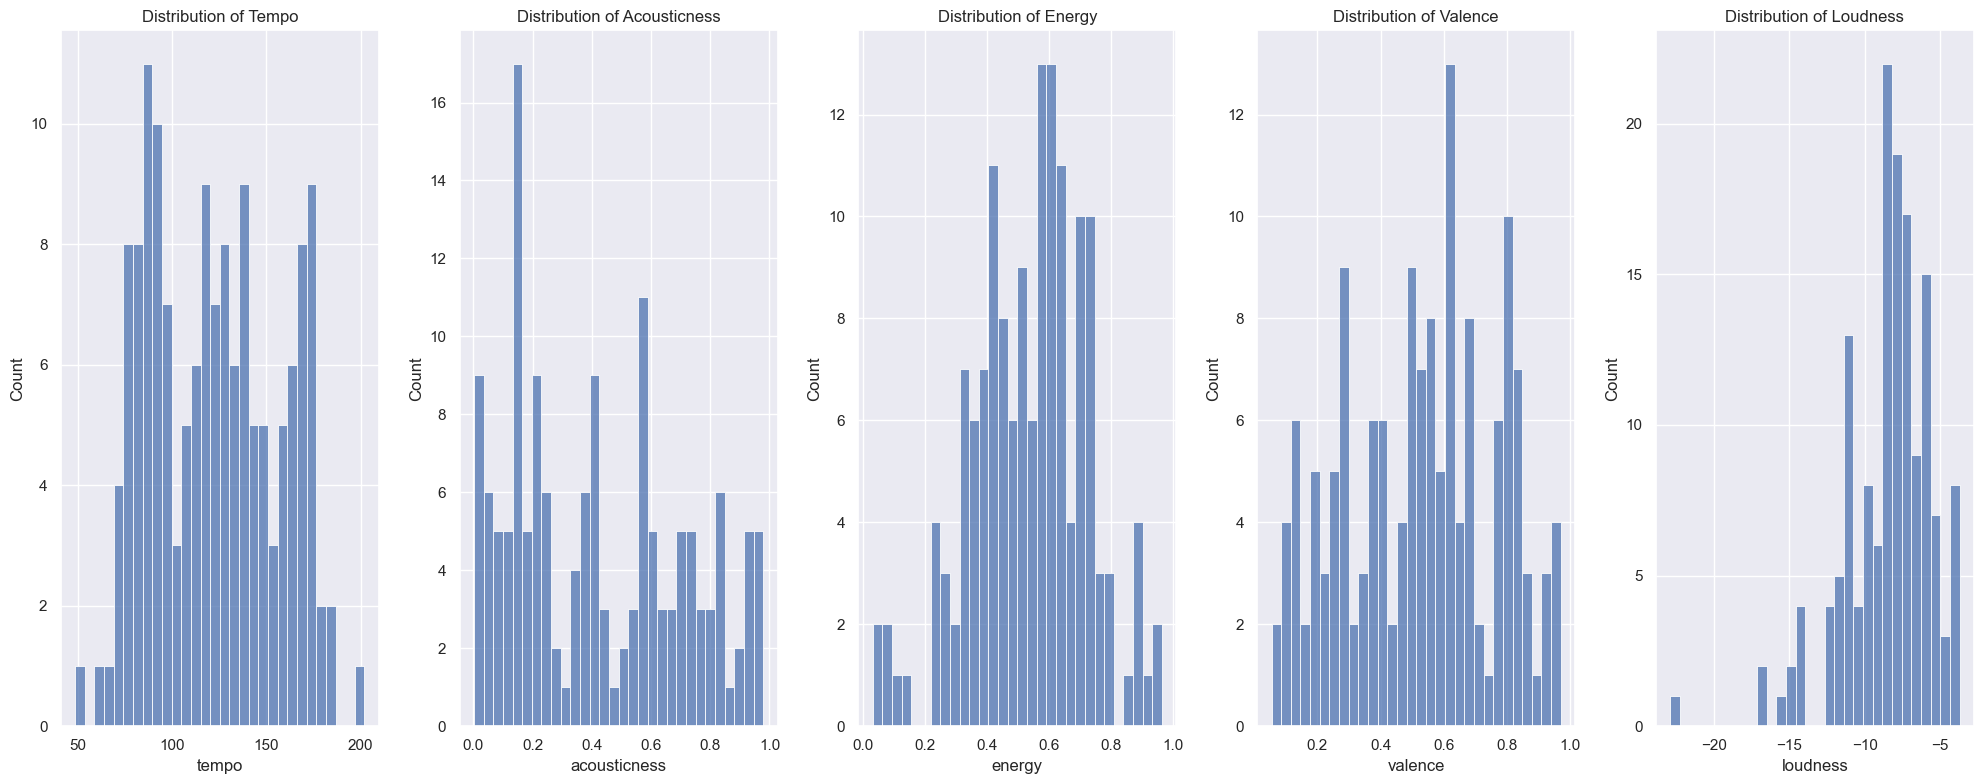

In [89]:
plot_distribution(df_top_tracks, ['tempo', 'acousticness', 'energy', 'valence','loudness'])

Below is audio features distribution for saved tracks, with a larger dataset than my top tracks. 

Considering I love hip-hop (less so nowadays to be fair, as my short term and medium term top tracks indicate), it is not surprising that I have a large count of songs low in acousticness when looking at my whole catalogue. 

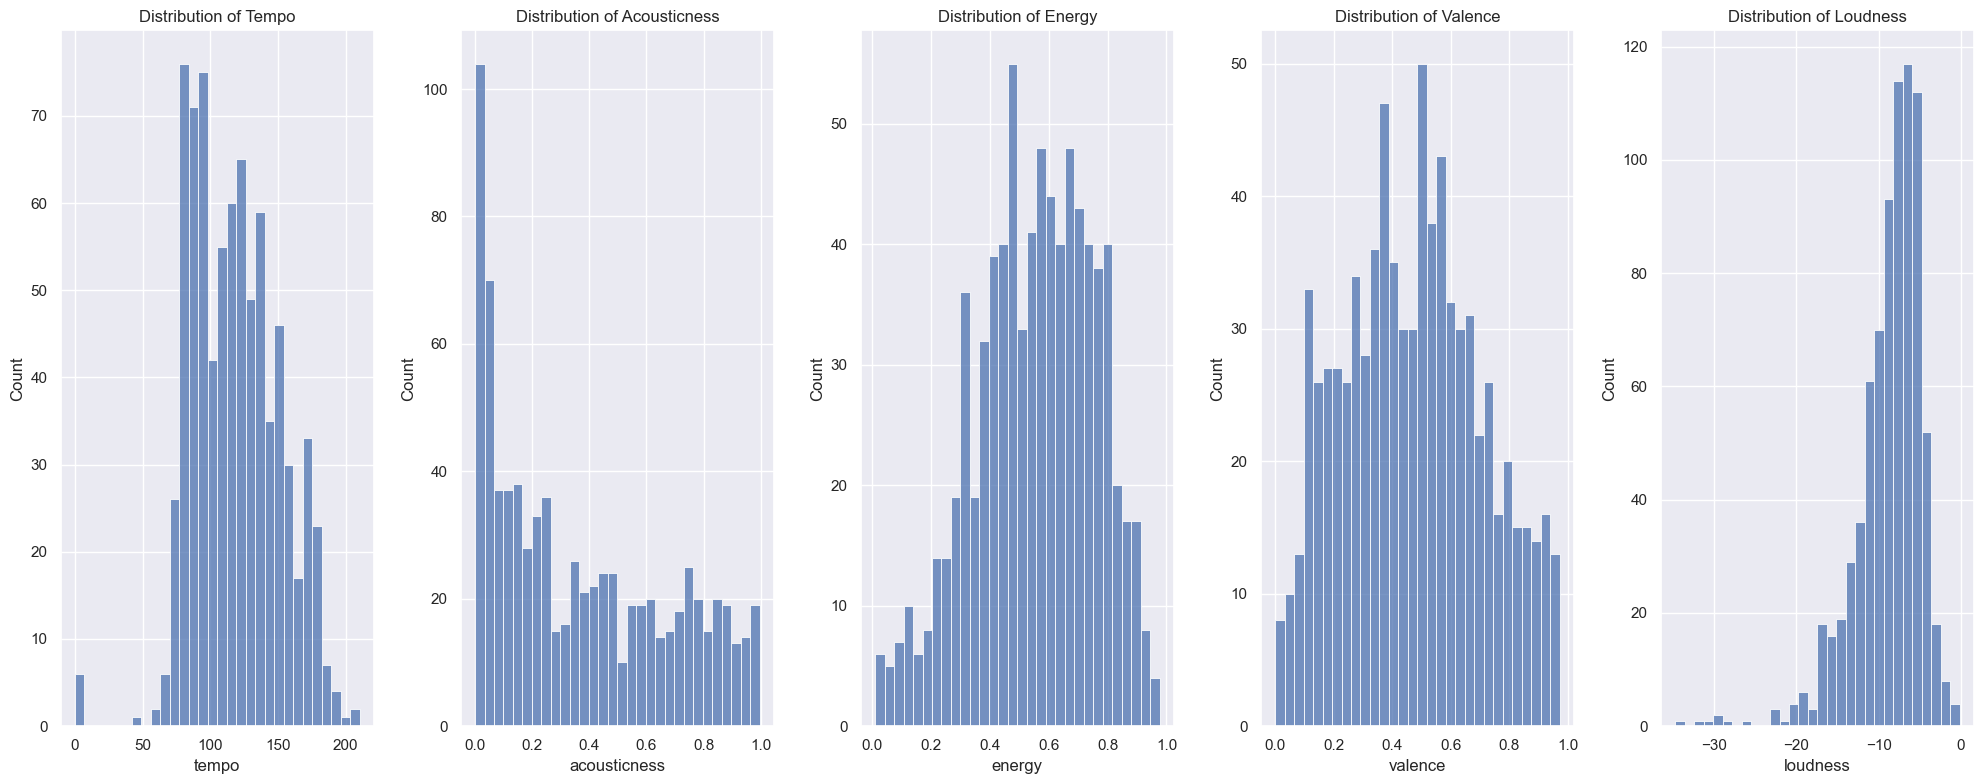

In [90]:
plot_distribution(df_saved_tracks, ['tempo', 'acousticness', 'energy', 'danceability','valence','loudness'])

Let's do something else thats interesting. 

In the below cell, let's take a look at the distribution of audio features from a single artist by pulling from my saved tracks. 

Let's pick Frank Ocean as he's one of my favorite artists (I was in the top 0.2% of his listeners last year on Spotify :)).  

The overall count is still low as it is not his entire catalogue/my saved Frank Ocean albums, but nonetheless when considering his catalogue and style, it's not much of a surprise that: 
- He has a large amount of acousticness (> 0.5) in a lot of songs 
- Valence,  Danceability, Energy, and Tempo distribution are skewed to the left implying most songs are lower in those features 

44


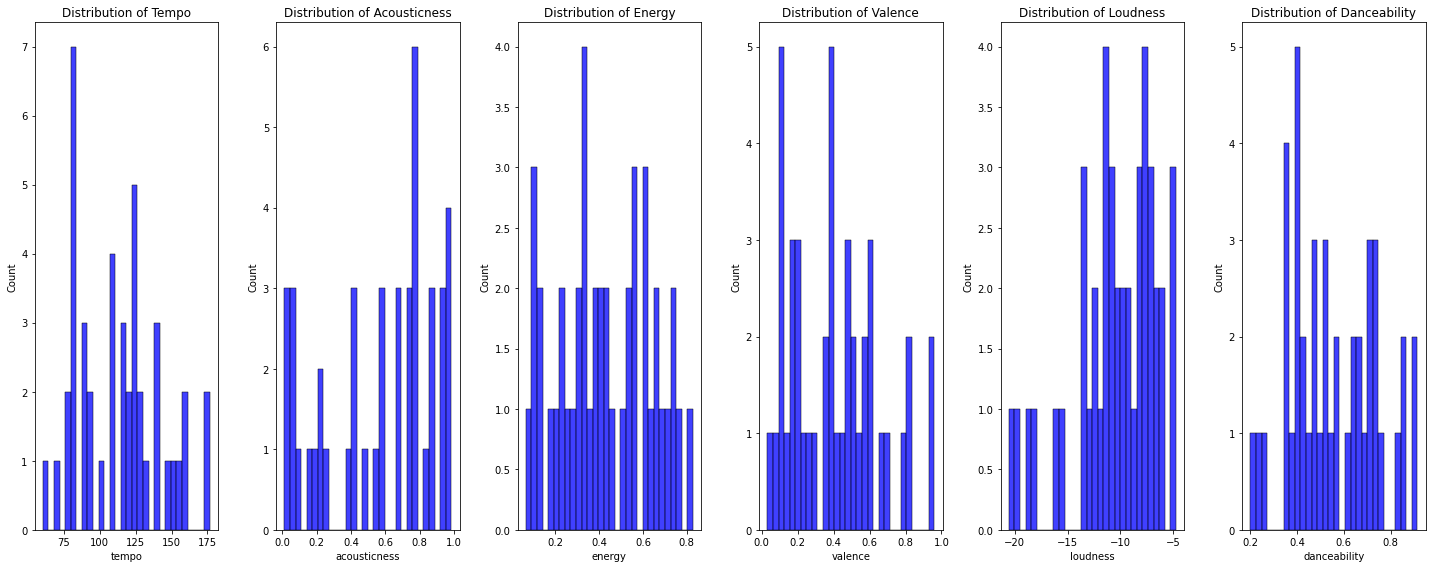

In [11]:
df_saved_tracks_frank_ocean=df_saved_tracks[df_saved_tracks['artist']=='Frank Ocean']
print(len(df_saved_tracks_frank_ocean))
plot_distribution(df_saved_tracks_frank_ocean, ['tempo', 'acousticness', 'energy', 'valence','loudness','danceability'])

Let's now plot the distribution of audio features of my top tracks segmented by the different time ranges. (ie. distribution of tempo in short term top tracks, medium term top tracks, and long term top tracks). 

You can see here how songs with high acousticness increased in the short and medium term vs long term as I noted prior. I have recently gotten a lot more into classic rock and neo soul (improvising guitar over neo soul songs is the best).

My songs have also had a higher energy, valence, and danceability in the short term (and in turn loudness - see scatter plot for evidence of the positive correlation), this is likely cause my song choices are more upbeat and positive during summer sunshine :)

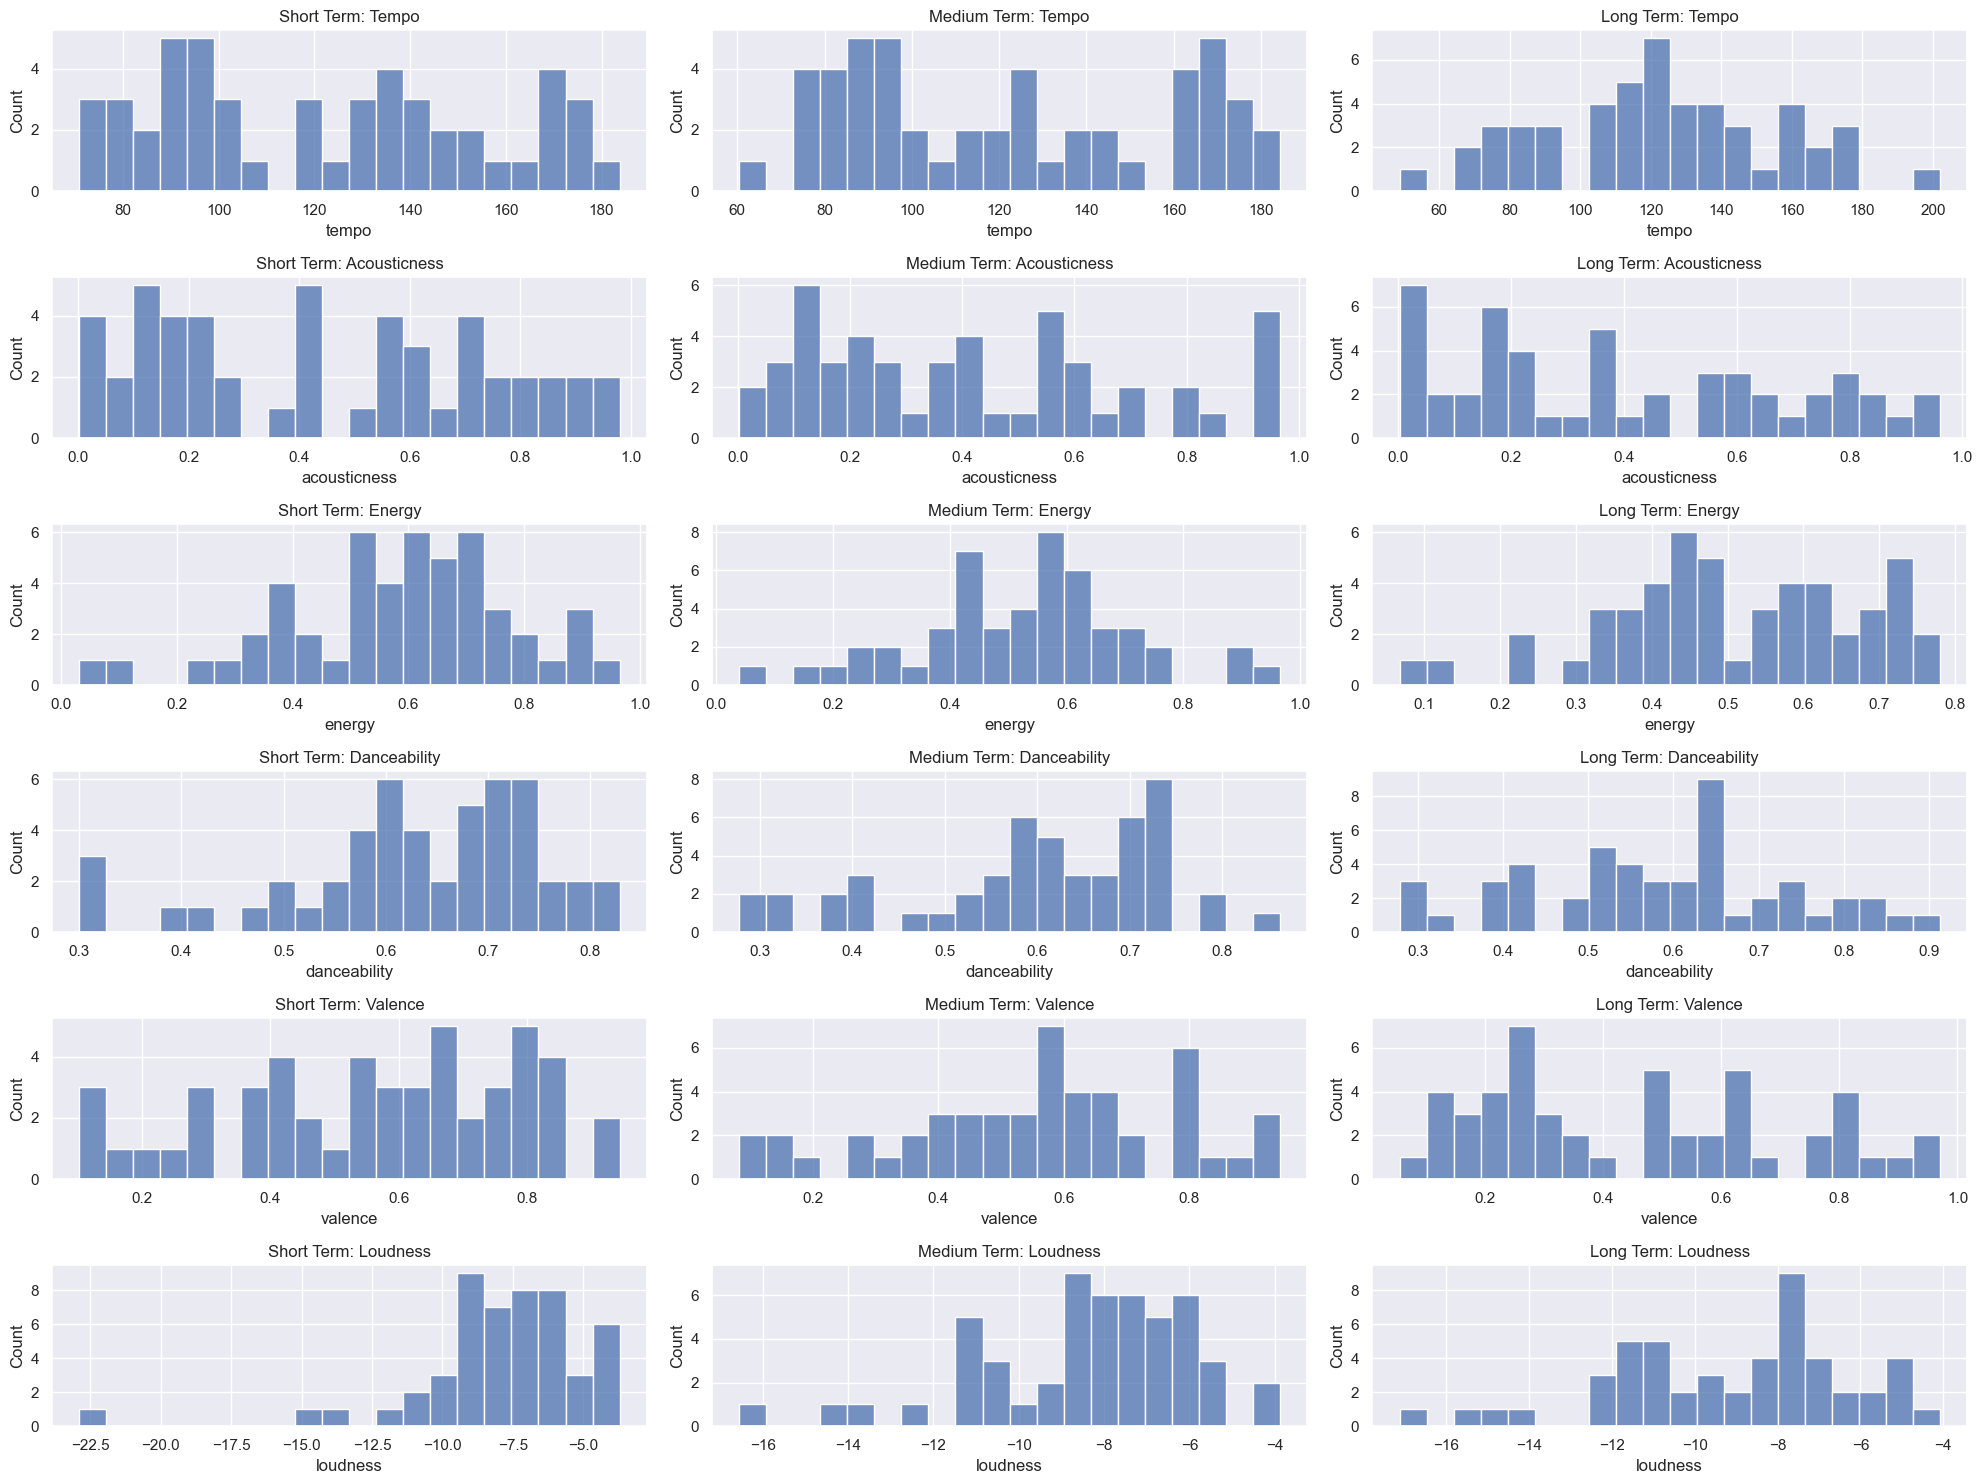

In [70]:
# Set up the matplotlib figure
def plot_distribution_timeframes(dataframes, features):
    f, axes = plt.subplots(len(features), 3, figsize=(20, 15))
    # Iterate over the features and terms, and plot the distributions
    terms = ['Short Term', 'Medium Term', 'Long Term']

    for i, feature in enumerate(features):
        for j, df in enumerate(dataframes):
            sns.histplot(df[feature],bins=20, kde=False, color="b", ax=axes[i, j]).set_title(f'{terms[j]}: {feature.capitalize()}')        
    plt.tight_layout()
    plt.show()
dataframes = [df_short_term_total, df_medium_term_total, df_long_term_total]
features=['tempo', 'acousticness', 'energy','danceability' 'valence','loudness']
plot_distribution_timeframes(dataframes, features)

Let's now look at how these audio features relate to each other by implementing the code cell below that will create scatter plots between the audio features with a third audio feature overlaid in a color mapping. Some obvious relationships we can note from the below graphs are: 

- Danceability, energy and loudness are inversely related to acousticness for the most part.  

- Speechiness tends to be higher for more energetic songs (likely rap songs). Some features clearly don't show a strong correlation. 

- Danceability also correlates with valence, which makes sense (happier songs are typically more likely to make someone want to dance)

- Loudness has a strong positive correlation with energy and somewhat of a correlation with danceability (also fairly logical)

- Next steps would be to document all patterns between multiple audio features and how they could relate to one another. Code wise, visualising a subset of the data to see if any trends are not being captured by the entire dataset being plotted would be needed (e.g. to filter only songs high in liveness to analyse the relationship between liveness and audio features as currently there is not much correlation) as well as combining features (e.g. ratio of loudnes/energy vs. valence etc.) 

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
# List of features to compare
feature_pairs = [
    ('danceability', 'energy'),
    ('valence','danceability'),
    ('valence', 'energy'),
    ('loudness','danceability'),
    ('loudness','energy'),
    ('acousticness','loudness'),
    ('tempo','danceability'),
    ('acousticness', 'danceability'),
    ('acousticness','energy')
]
color_features=['acousticness','acousticness','speechiness','acousticness','acousticness','liveness','speechiness','speechiness','loudness']
df = df_top_tracks
def plot_scatter2(df, feature_pairs, color_features):
    assert len(feature_pairs) == len(color_features), "Each pair of features should have a corresponding color feature"
    
    sns.set_theme()
    ncols = 3  # or whatever you prefer
    nrows = int(np.ceil(len(feature_pairs) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*7, nrows*7), constrained_layout=True)

    for idx, pair in enumerate(feature_pairs):
        color_feature = color_features[idx]
        ax = axes[idx//ncols, idx%ncols]
        if color_feature != pair[0] and color_feature != pair[1]:
            mappable = ax.scatter(df[pair[0]], df[pair[1]], c=df[color_feature], cmap='viridis_r', alpha=0.7, edgecolor=None)
            fig.colorbar(mappable, ax=ax, label=color_feature.capitalize())
        else:
            ax.scatter(df[pair[0]], df[pair[1]], alpha=0.7, edgecolor=None)
        ax.set_title(f'{pair[0].capitalize()} vs {pair[1].capitalize()} ({color_feature.capitalize()} as color)', fontsize=15)
        ax.set_xlabel(pair[0].capitalize(), fontsize=13)
        ax.set_ylabel(pair[1].capitalize(), fontsize=13)

    # Remove empty subplots
    if len(feature_pairs) % ncols != 0:
        for ax in axes.flatten()[len(feature_pairs):]:
            fig.delaxes(ax)
    plt.show()


/var/folders/86/2y0z8xdn0rq5s4jrsy_br6zm0000gn/T/ipykernel_29048/2223471458.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(mappable, ax=ax, label=color_feature.capitalize())


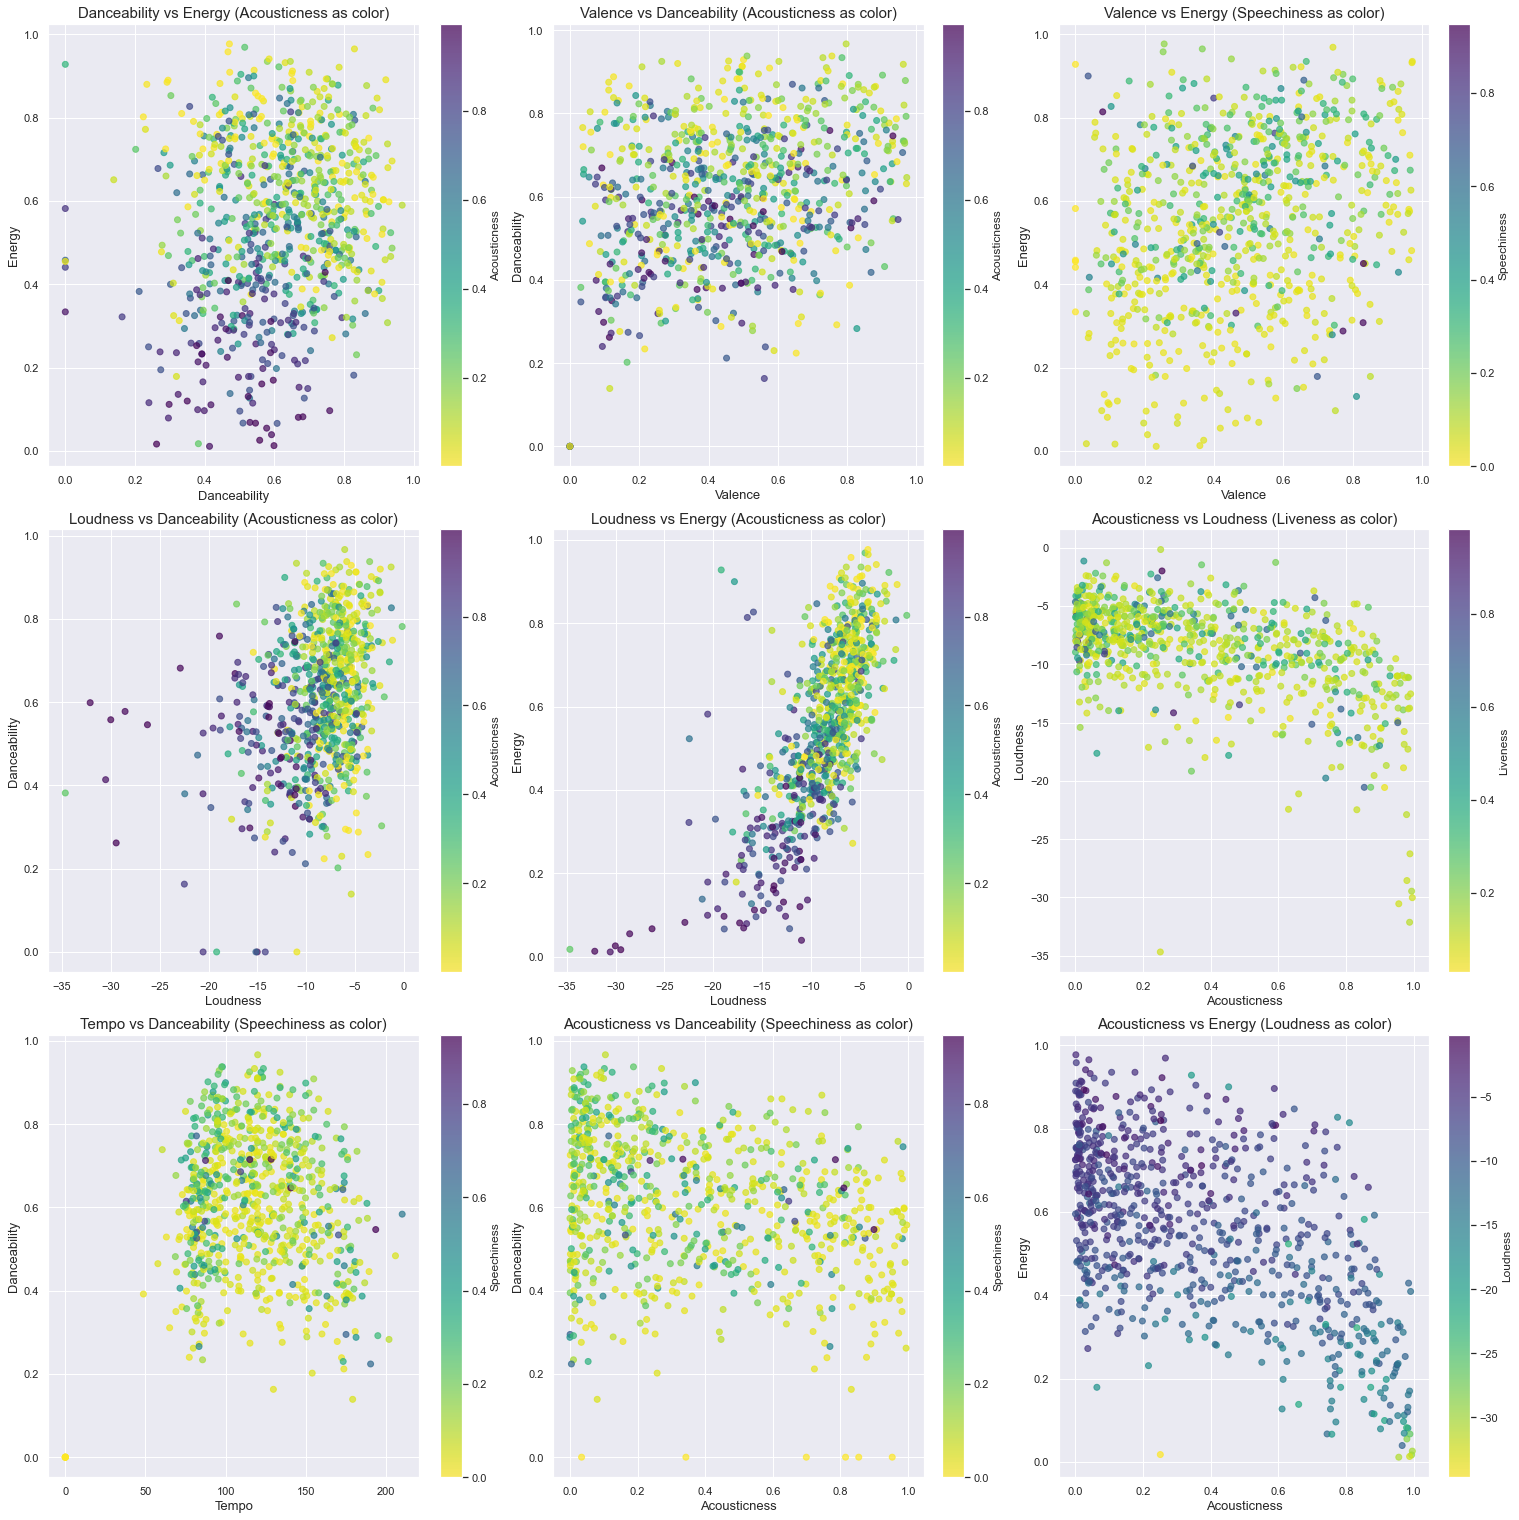

In [37]:
plot_scatter2(df_saved_tracks, feature_pairs,color_features)

Let's now create a correlation matrix and heat map for these audio features to better quantify the relationships between audio features visualised above. We'll do this for both my top tracks (smaller dataset) and saved tracks (larget dataset). 

It should be noted that this will only showcase linear correlations, so non-linear relationships may still exist even when a correlation matrix showcases low correaltion. 

As well, one should keep in mind that correlation doesn't mean causation and should consider the context and meaning behind the audio features in question.

Corr Matrix for My Top Tracks


,danceability,energy,tempo,acousticness,liveness,valence,speechiness,loudness,key
danceability,1.000000,0.224654,-0.137023,-0.186111,-0.046266,0.413328,0.217743,0.074437,0.284824
energy,0.224654,1.000000,0.196577,-0.625691,0.009108,0.478992,0.135837,0.645202,0.304446
tempo,-0.137023,0.196577,1.000000,-0.102049,0.090658,0.063615,-0.029835,-0.000146,0.045868
acousticness,-0.186111,-0.625691,-0.102049,1.000000,0.004633,-0.199137,-0.098931,-0.374826,-0.236950
liveness,-0.046266,0.009108,0.090658,0.004633,1.000000,-0.008977,0.067670,0.161606,-0.159319
valence,0.413328,0.478992,0.063615,-0.199137,-0.008977,1.000000,0.053832,0.255949,0.263998
speechiness,0.217743,0.135837,-0.029835,-0.098931,0.067670,0.053832,1.000000,0.134129,0.089901
loudness,0.074437,0.645202,-0.000146,-0.374826,0.161606,0.255949,0.134129,1.000000,0.203194
key,0.284824,0.304446,0.045868,-0.236950,-0.159319,0.263998,0.089901,0.203194,1.000000


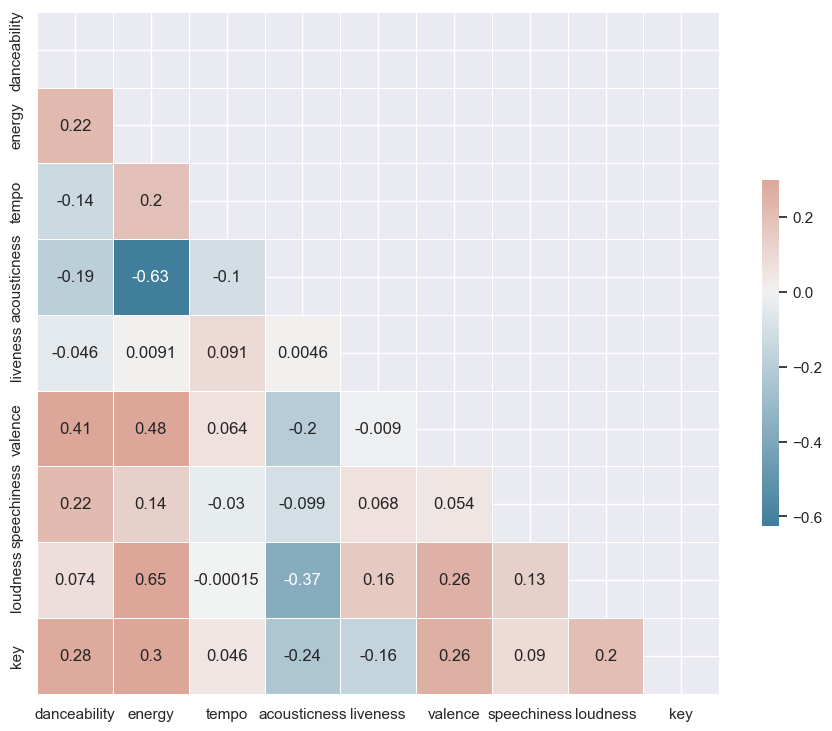

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_heatmap(df, features):
    # Create a correlation matrix
    corr = df[features].corr()
    display(corr)
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    plt.show()
features=['danceability', 'energy', 'tempo', 'acousticness', 'liveness', 'valence','speechiness', 'loudness','key' ]
df=df_top_tracks
print('Corr Matrix for My Top Tracks')
plot_heatmap(df,features)

Corr Matrix for My Saved Tracks


,danceability,energy,tempo,acousticness,liveness,valence,speechiness,loudness,key
danceability,1.000000,0.145770,-0.026416,-0.299176,-0.213814,0.292166,0.116813,0.317722,0.048049
energy,0.145770,1.000000,0.050142,-0.589555,0.261560,0.267605,0.238370,0.707406,0.058992
tempo,-0.026416,0.050142,1.000000,-0.070023,0.006184,0.056750,0.019481,-0.006138,-0.000053
acousticness,-0.299176,-0.589555,-0.070023,1.000000,-0.085984,-0.116549,-0.113328,-0.523821,-0.035191
liveness,-0.213814,0.261560,0.006184,-0.085984,1.000000,0.002952,0.222986,0.108444,-0.047578
valence,0.292166,0.267605,0.056750,-0.116549,0.002952,1.000000,0.067288,0.190366,0.098114
speechiness,0.116813,0.238370,0.019481,-0.113328,0.222986,0.067288,1.000000,0.175449,0.026912
loudness,0.317722,0.707406,-0.006138,-0.523821,0.108444,0.190366,0.175449,1.000000,0.047661
key,0.048049,0.058992,-0.000053,-0.035191,-0.047578,0.098114,0.026912,0.047661,1.000000


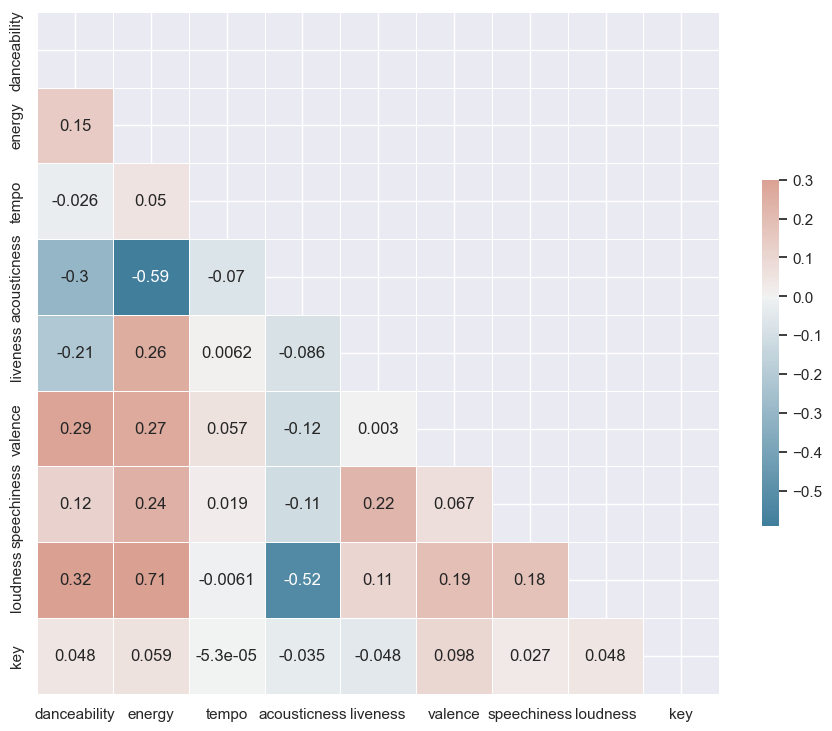

In [103]:
print('Corr Matrix for My Saved Tracks')
plot_heatmap(df_saved_tracks,features)

## Genre Analysis for Saved Tracks

In this section, we aim to uncover insights about the genres that dominate my saved tracks. Given that Spotify labels each track with a set of genres, this will involve unpacking the list of genres associated with each track and examining the frequency of each genre.

This can be accomplished in three key steps:
1. **Genre Extraction**: We first extract the list of genres for each track and flatten it into a list that encapsulates all genres across tracks.
2. **Genre Counting**: Using this comprehensive list of genres, we then count the occurrence of each genre to understand the distribution of genres across my saved tracks.
3. **Data Visualization**: Finally, we visualize these genre counts using a bar chart. This will offer a clear view of the most prevalent genres in my music library.

Note: A track can be associated with multiple genres, making this a multi-label classification scenario. Therefore, it's important to bear in mind that the sum of the genre frequencies may exceed the total number of tracks.


In [138]:
import seaborn as sns

def plot_top_genres(df, plot_title):
    def eval_genres(val):
        try:
            if isinstance(val, str):
                if val.startswith('[') and val.endswith(']'):
                    return ast.literal_eval(val)
                elif ',' in val:
                    return [x.strip() for x in val.split(',')]
                elif val == '':
                    return []
                else:
                    return [val]
            elif isinstance(val, list):
                return val
        except ValueError:
            return []
    
    df_genres = df.copy()
    df_genres['genres'] = df_genres['genres'].apply(eval_genres)
    df_genres['genres'] = df_genres['genres'].apply(lambda x: x if isinstance(x, list) else [])
    
    all_genres = [genre for sublist in df_genres['genres'].tolist() for genre in sublist if isinstance(sublist, list)]
    
    genre_counts = pd.Series(all_genres, dtype='object').value_counts()

    plt.figure(figsize=(10,8))
    sns.barplot(x=genre_counts[:20].values, y=genre_counts[:20].index, palette="viridis")
    plt.title(plot_title)
    plt.xlabel('Count')
    plt.show()

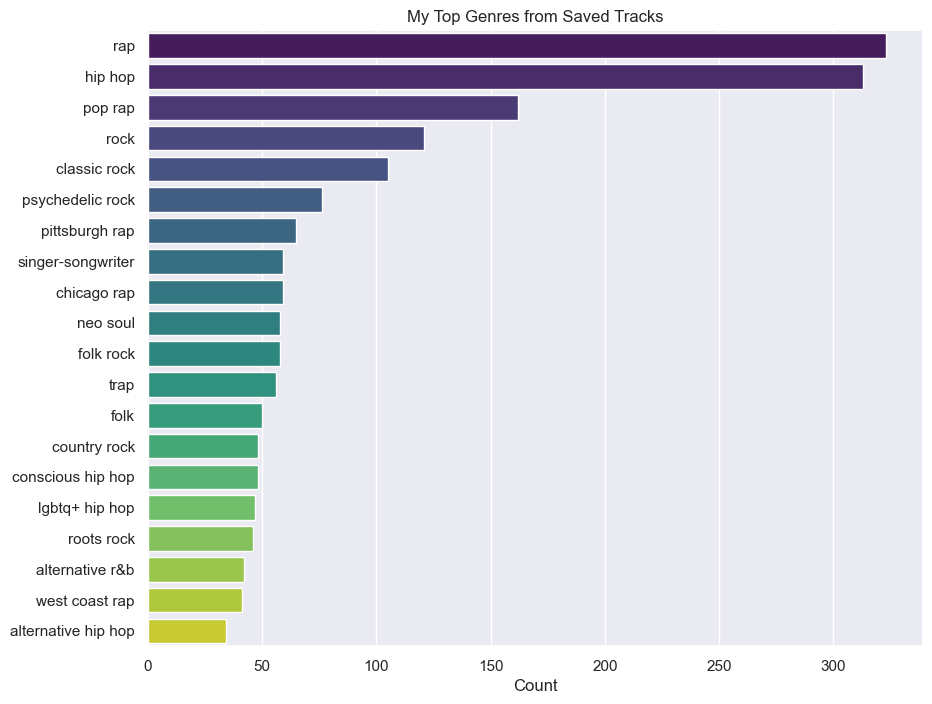

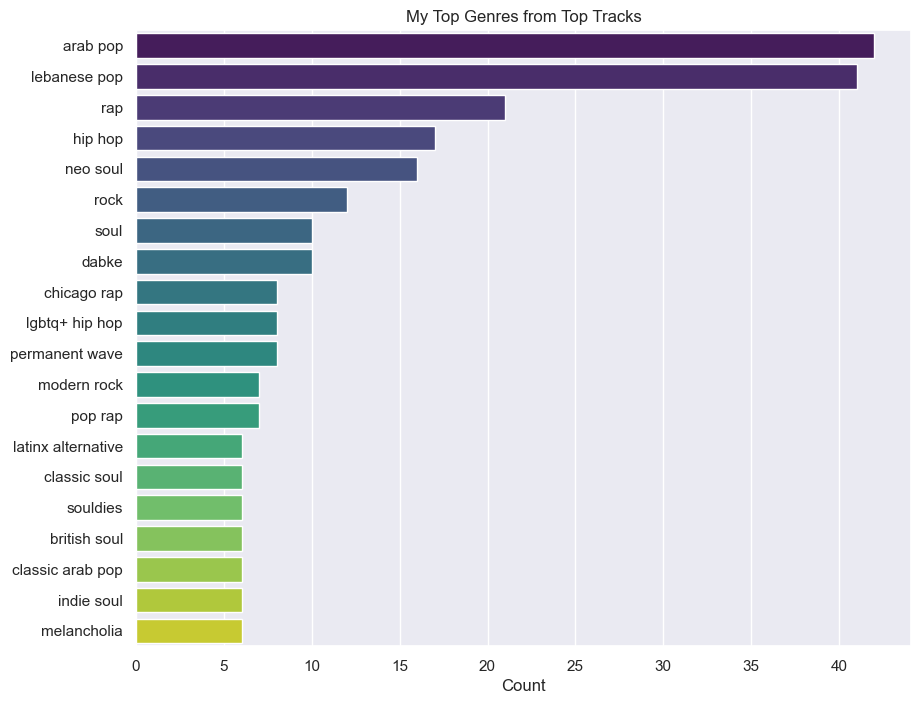

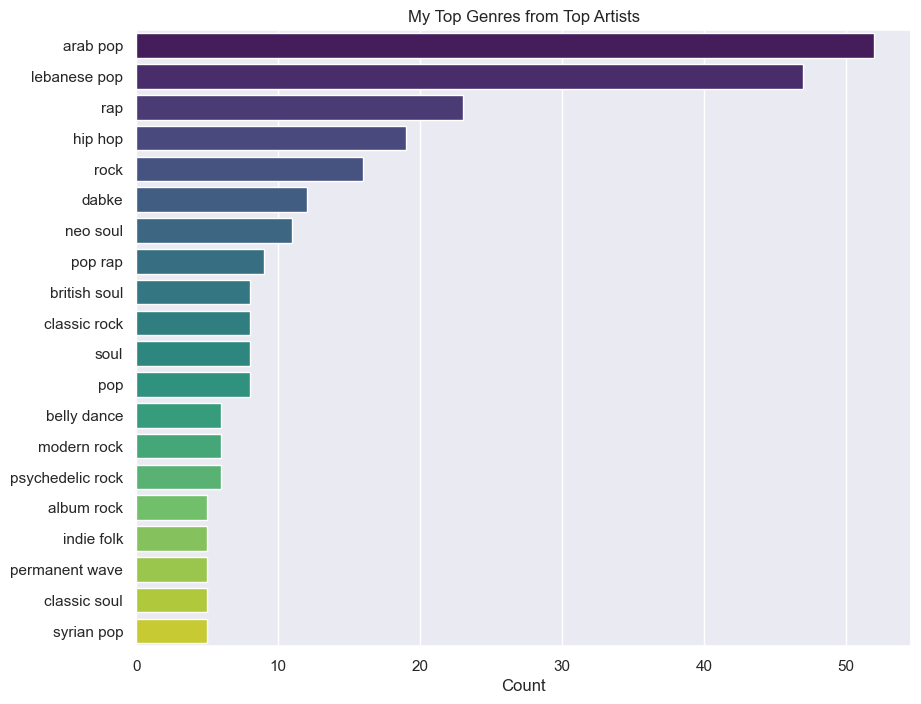

In [139]:
plot_top_genres(df_saved_tracks, 'My Top Genres from Saved Tracks')
plot_top_genres(df_top_tracks, 'My Top Genres from Top Tracks')
plot_top_genres(df_top_artists, 'My Top Genres from Top Artists')

While the 'saved tracks' genre distribution represents my personal music taste, the 'top tracks' and 'top artists' charts also include music enjoyed by my family, as we use my Spotify account to stream music on our home audio system. This leads to the presence of genres such as Arab pop, which feature prominently in 'top tracks' and 'top artists' but are not present in my 'saved tracks'.

Our next steps (to be uploaded): 

- Segmenting my top genres for my top tracks based on different time frames (short, medium, and long) to see how things have changed

- Incorporating network graphs to utilise in my playlist recommender model (showcase how songs or artists relate to one another based on similar audio features and my listening patterns/top artists/top tracks)

- Incorporating grapsh as above to attempt to understand my model e.g. features of recommended songs vs features of the songs I listen to (bar chart)

- Further analysing the audio features' relationships as mentioned in the scatter plot markdown cell

- Implementing a chronological visualisation of my saved tracks over time or of my saved albums
